In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm, trange

In [8]:
loc_df = pd.read_csv("loc.csv", header=0, index_col=0)
cc_df = pd.read_csv("cc.csv", header=0, index_col=0)
cog_df = pd.read_csv("cog.csv", header=0, index_col=0)
halstead_df = pd.read_csv("halstead.csv", header=0, index_col=0)


In [3]:
loc_df.head()


,Repo,FunctionNumber,PromptType,Model,OriginalLOC,GeneratedLOC
0,craftship_codebox-npm,1,type1,GPT-3_5-Turbo,100,41
1,craftship_codebox-npm,1,type2,GPT-3_5-Turbo,100,50
2,craftship_codebox-npm,1,type3,GPT-3_5-Turbo,100,46
3,craftship_codebox-npm,1,type1,GPT-4,100,75
4,craftship_codebox-npm,1,type2,GPT-4,100,64


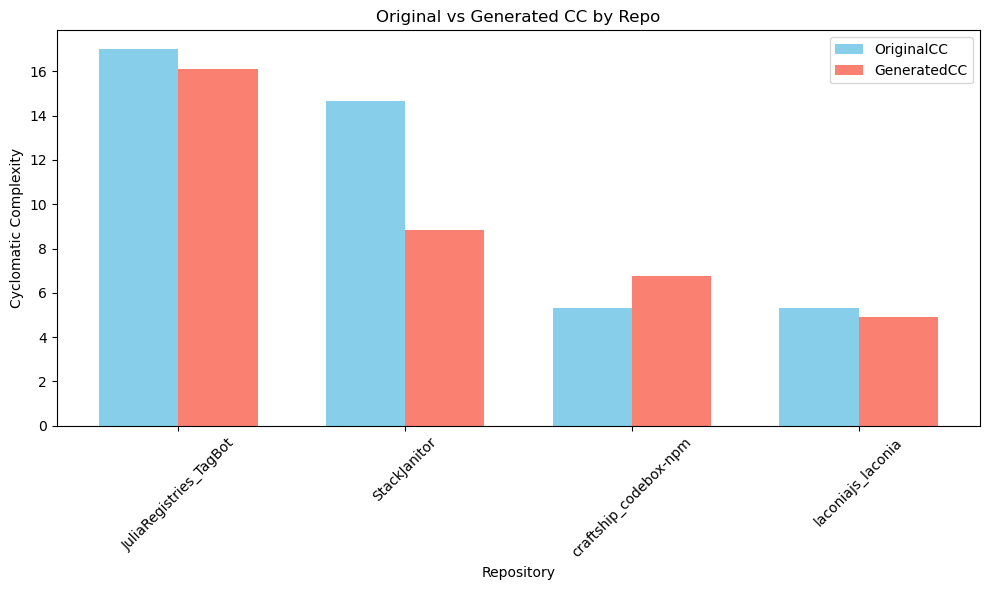

In [4]:
grouped_df = cc_df.groupby("Repo")[["OriginalCC", "GeneratedCC"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
bar_positions = range(len(grouped_df))

# Plot OriginalMetric
ax.bar(bar_positions, grouped_df["OriginalCC"], width=bar_width, label="OriginalCC", color="skyblue")

# Plot GeneratedMetric next to OriginalMetric
ax.bar([pos + bar_width for pos in bar_positions], grouped_df["GeneratedCC"], width=bar_width, label="GeneratedCC", color="salmon")

ax.set_xlabel("Repository")
ax.set_ylabel("Cyclomatic Complexity")
ax.set_title("Original vs Generated CC by Repo")
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(grouped_df["Repo"])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
def plot_grouped_chart(df: pd.DataFrame, group_key: str, group_label: str, original_metric_key: str, original_label: str, generated_metric_key: str, generated_label: str, metric_label: str, show: bool=False, save: bool=True):
    grouped_df = df.groupby(group_key)[[original_metric_key, generated_metric_key]].mean().reset_index()

    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    bar_positions = range(len(grouped_df))

    ax.bar(bar_positions, grouped_df[original_metric_key], width=bar_width, label=original_label, color="skyblue")
    ax.bar([pos + bar_width for pos in bar_positions], grouped_df[generated_metric_key], width=bar_width, label=generated_label, color="salmon")

    ax.set_xlabel(group_label)
    ax.set_ylabel(f"Average {metric_label}")
    ax.set_title(f"Average Original vs Generated {metric_label} by {group_label}")
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    ax.set_xticklabels(grouped_df[group_key])
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()

    if show:
        plt.show()
    
    if save:
        plt.savefig(f"./plots/{group_key}_original_vs_generated_{metric_label}.png", dpi=600)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

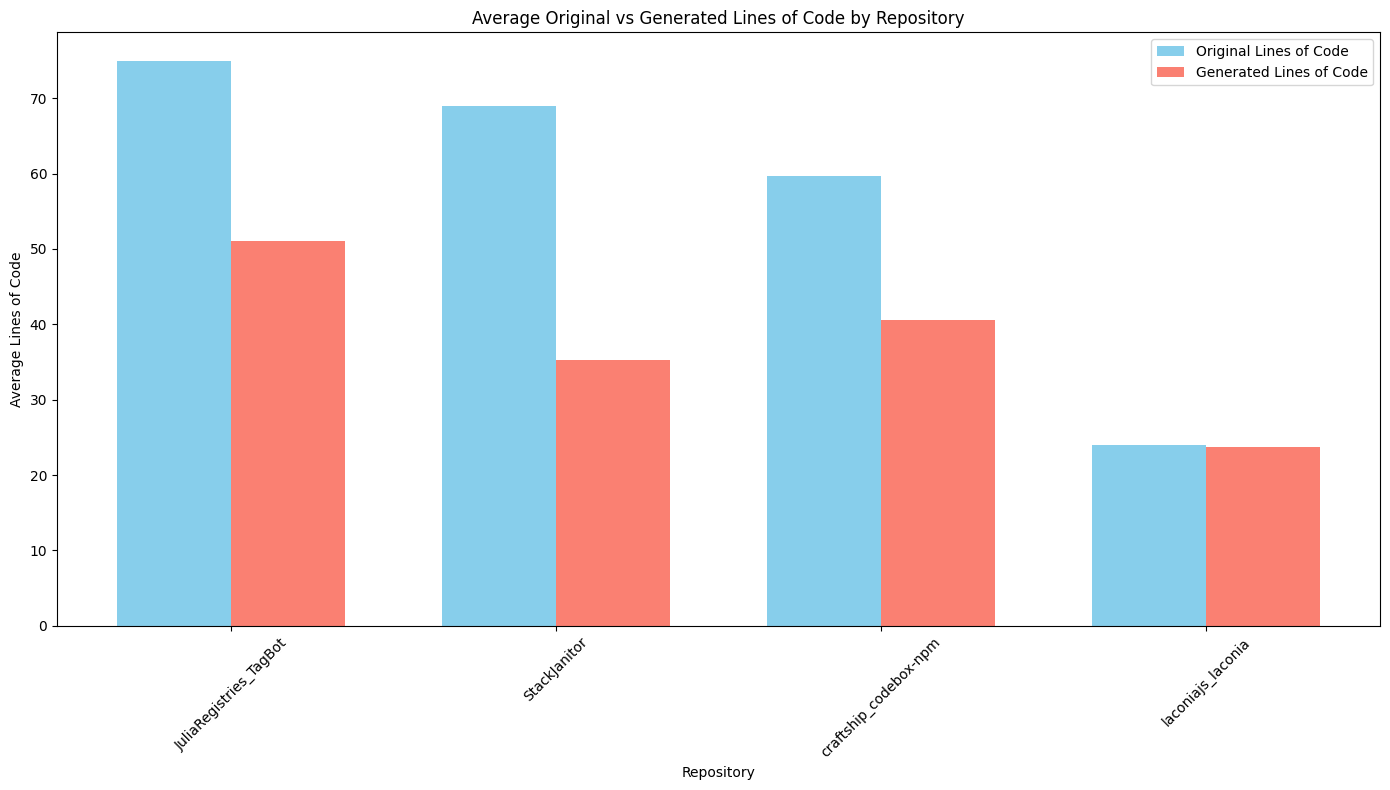

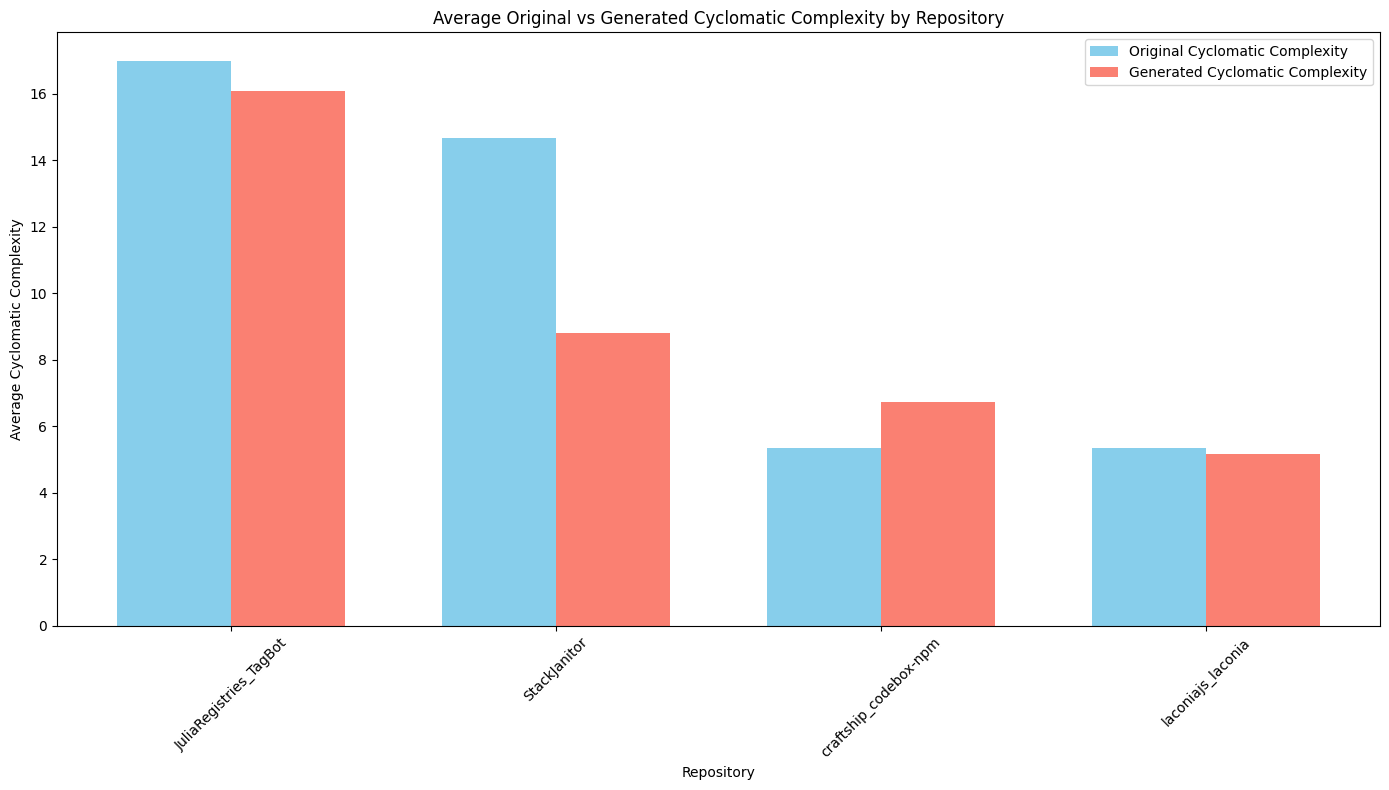

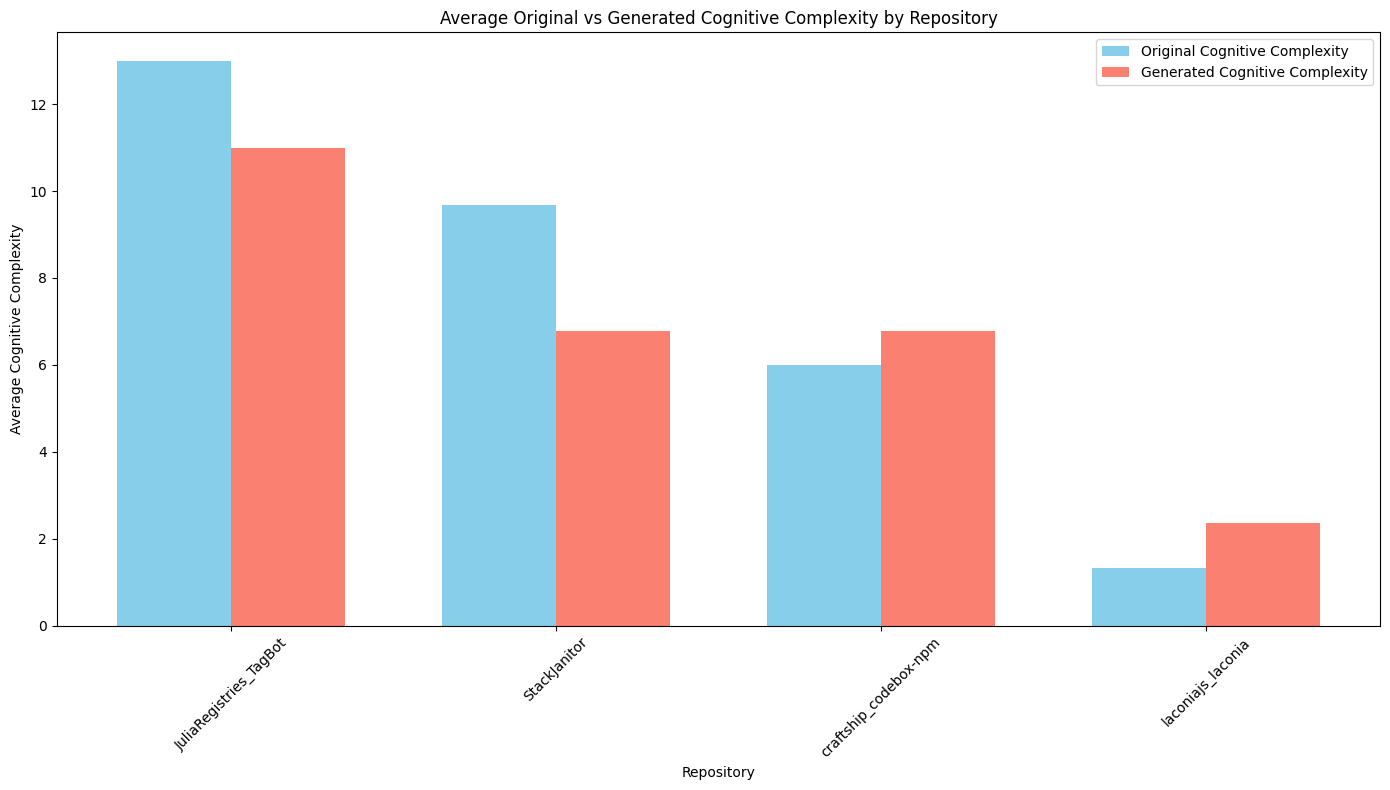

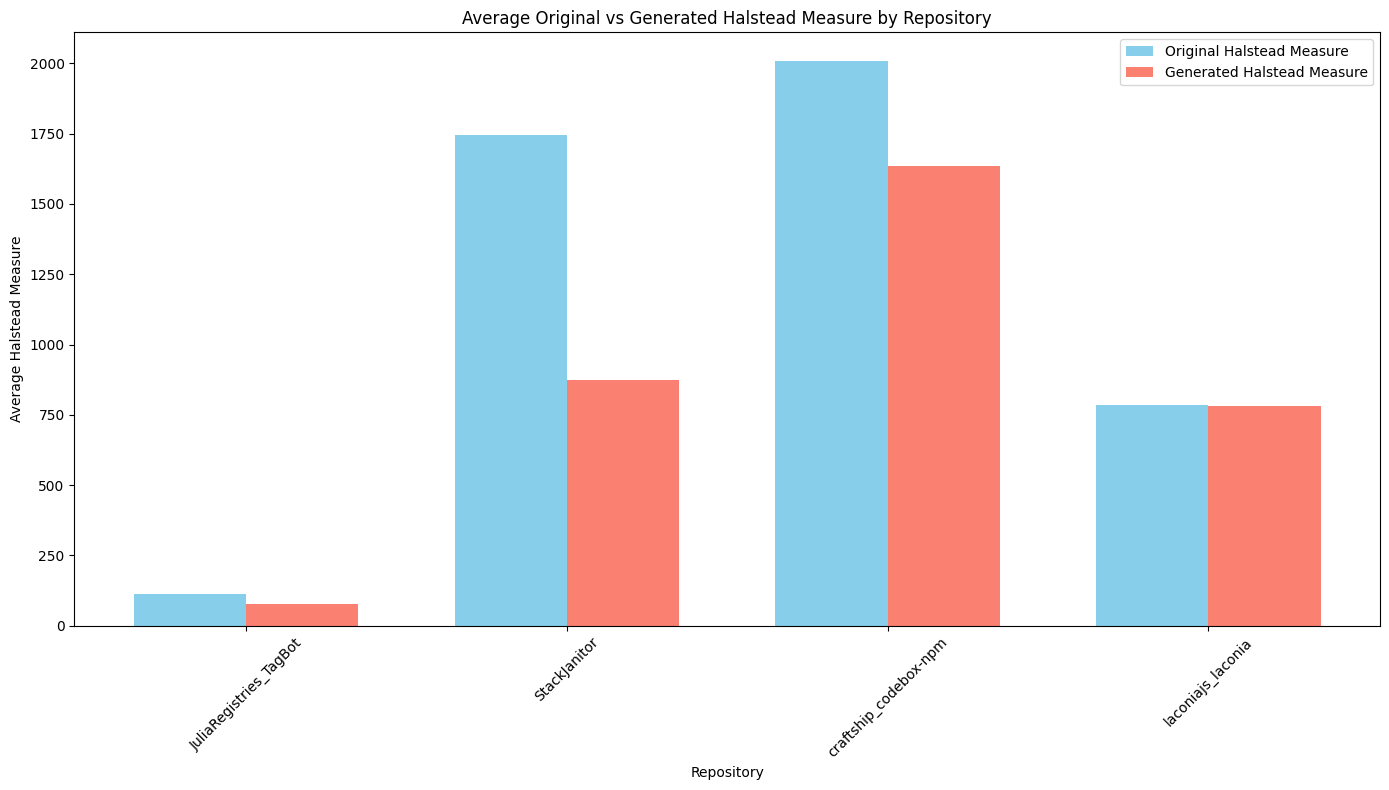

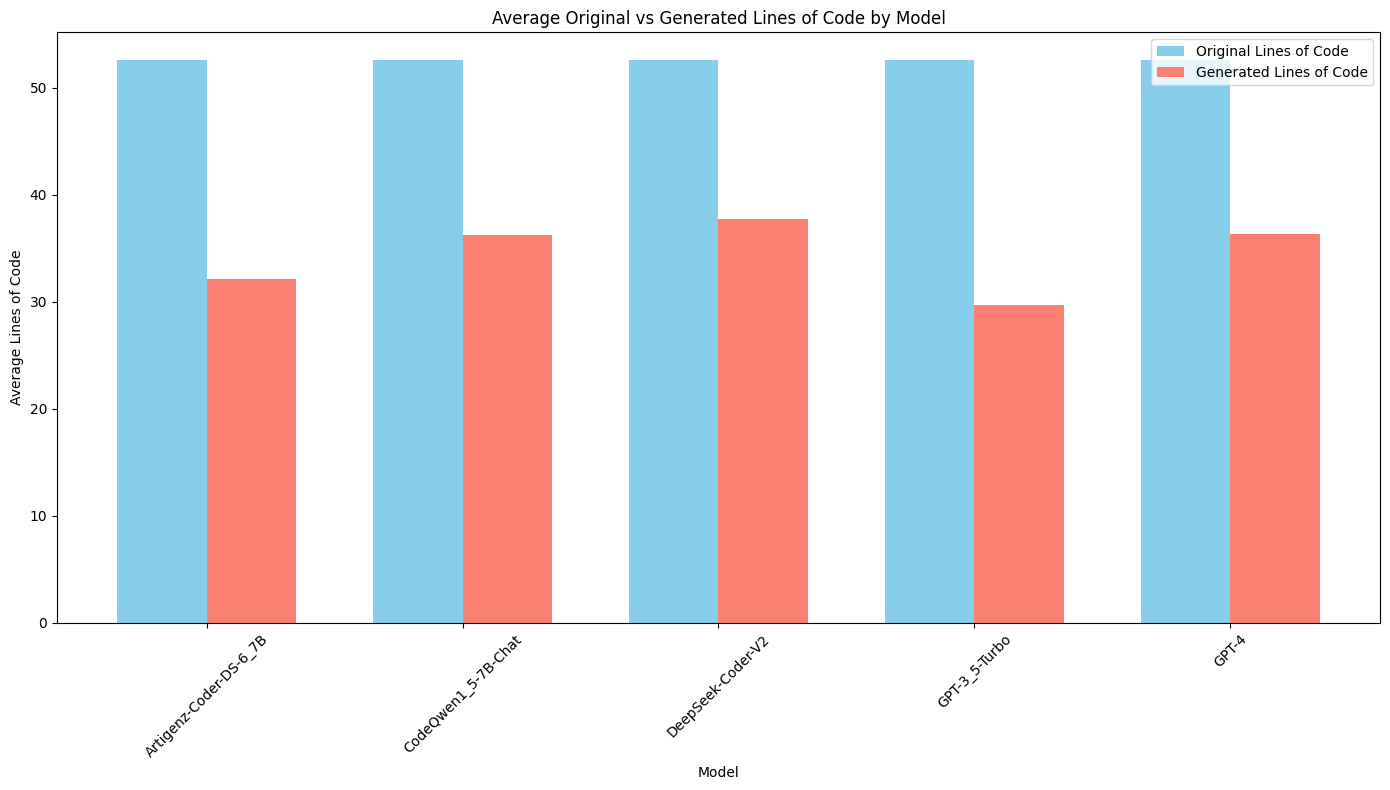

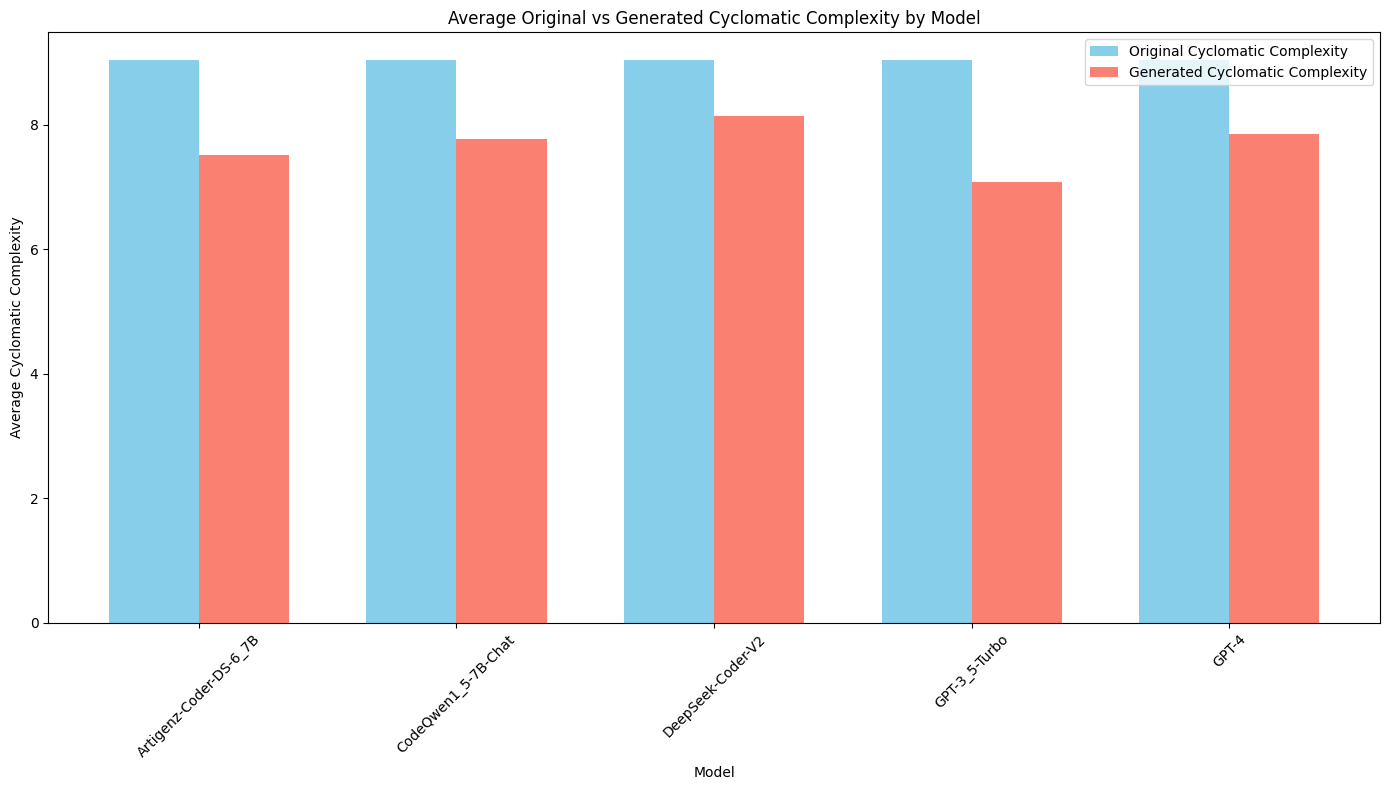

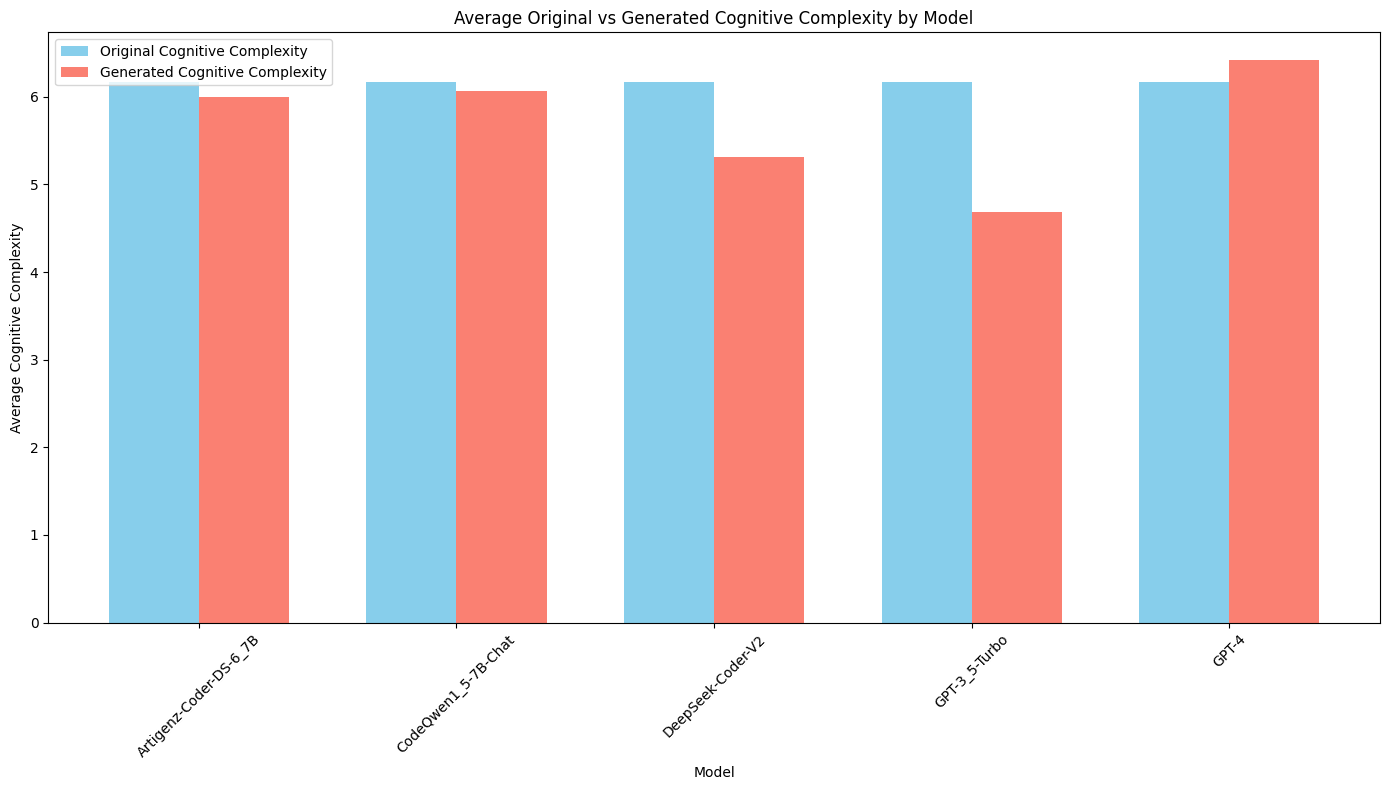

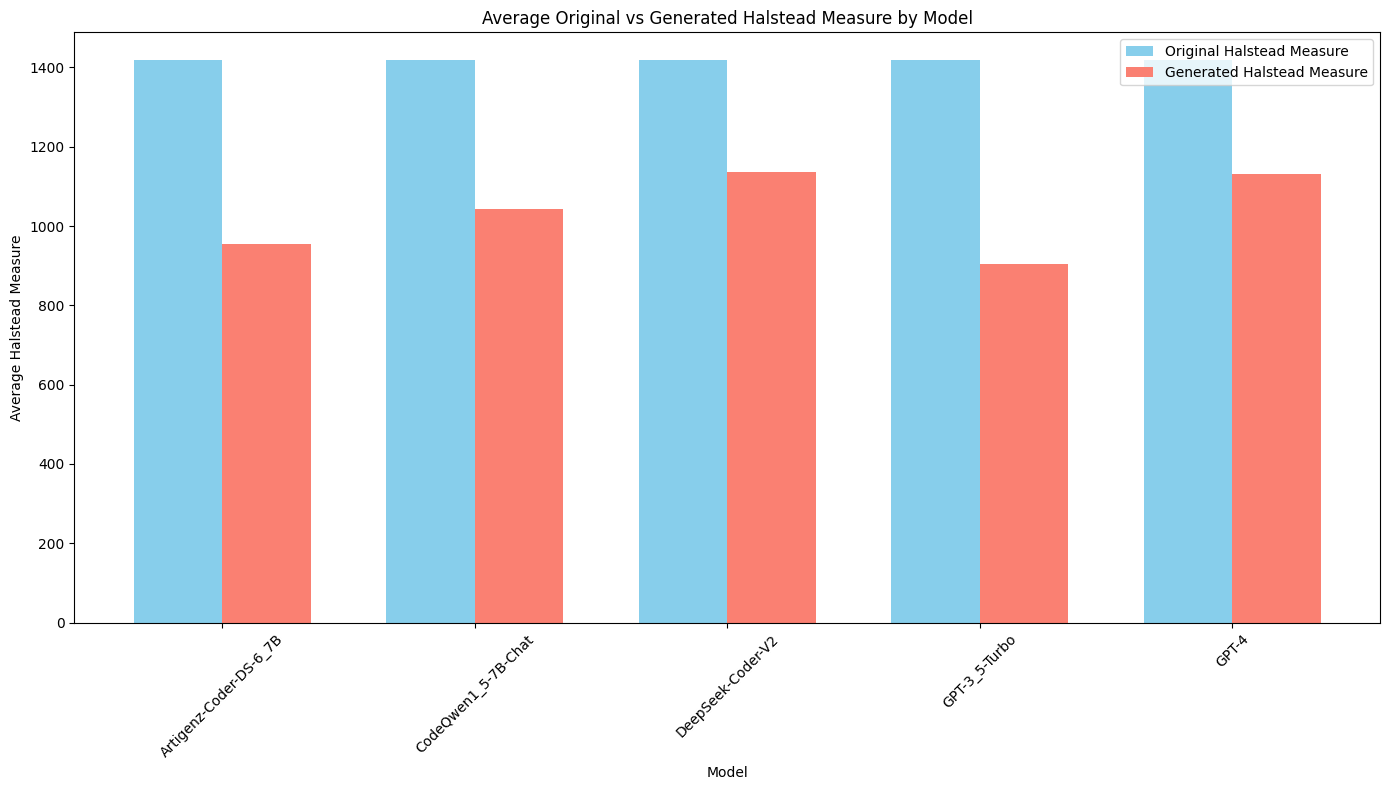

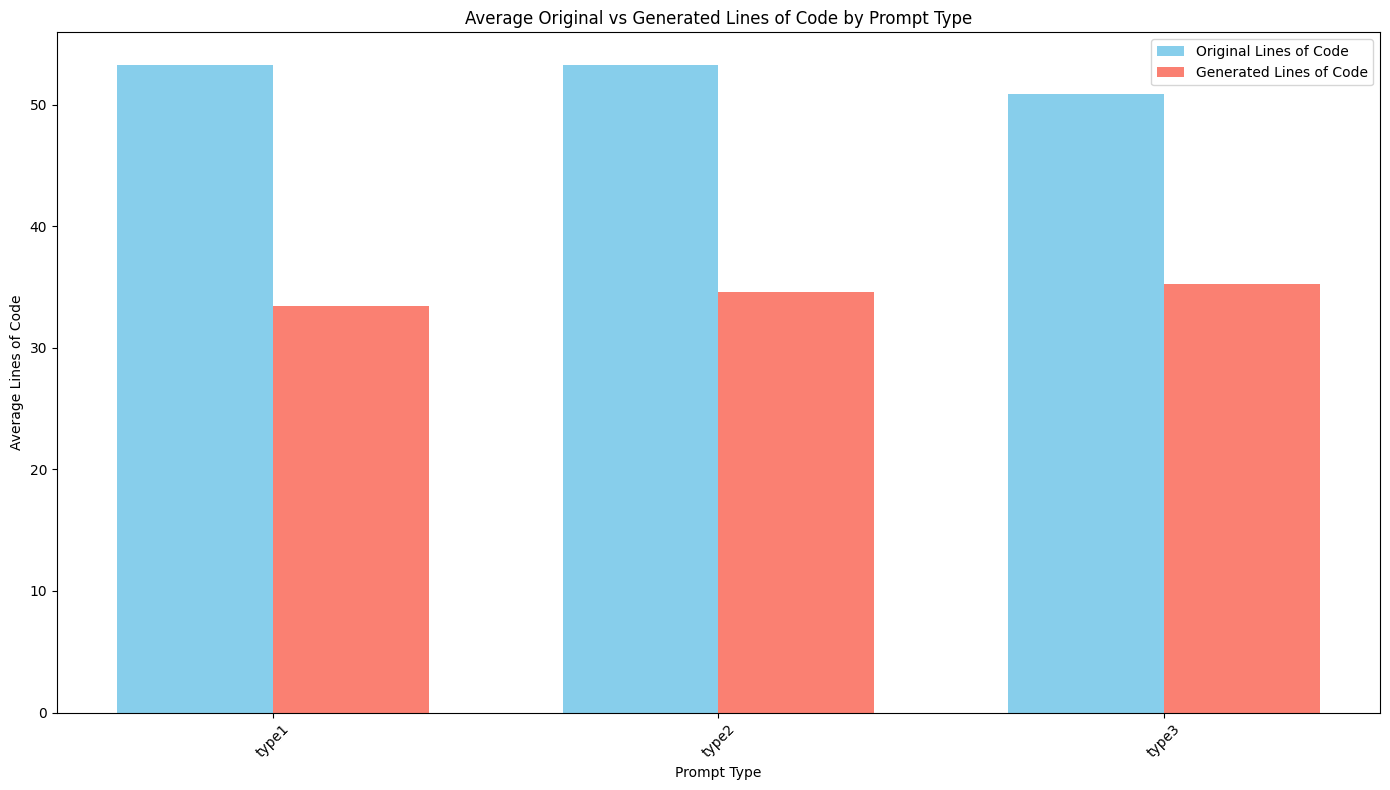

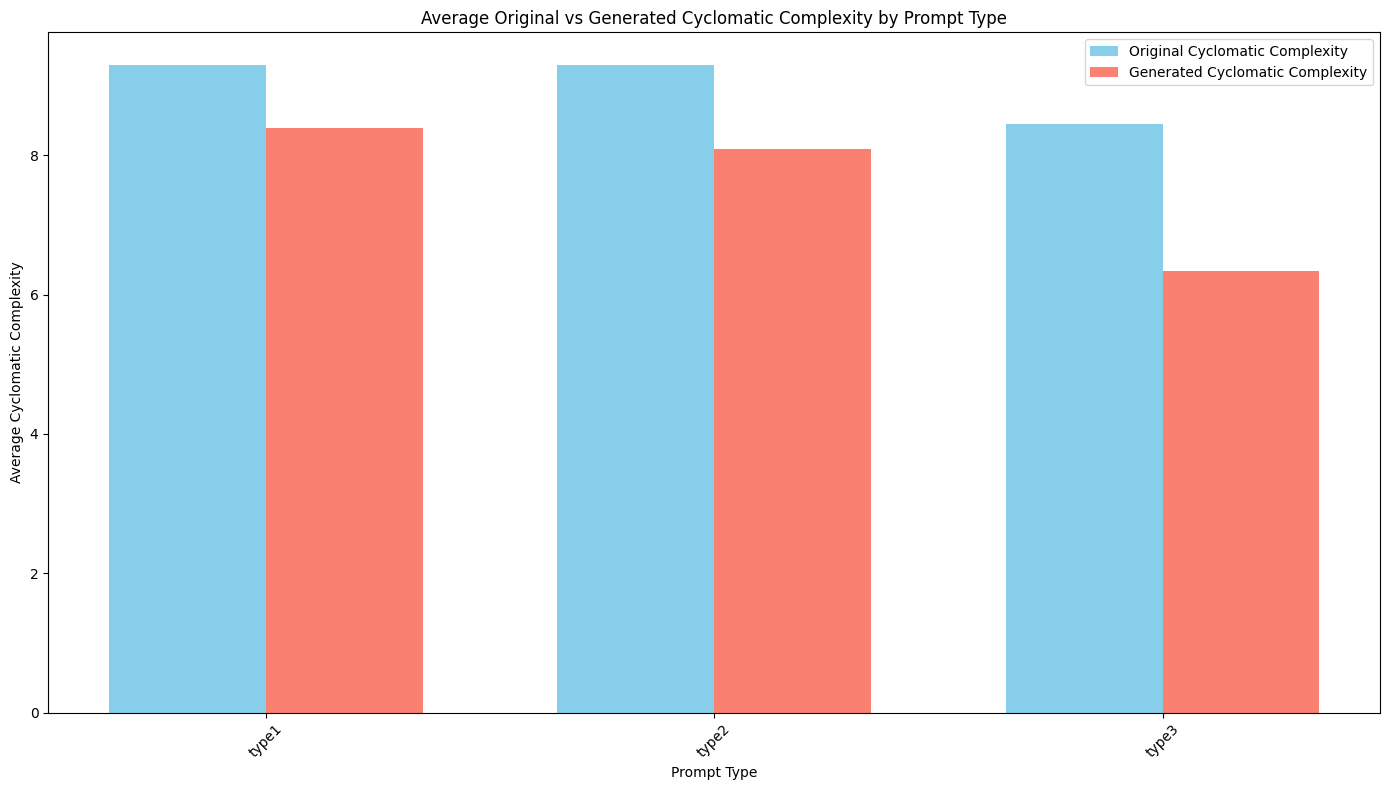

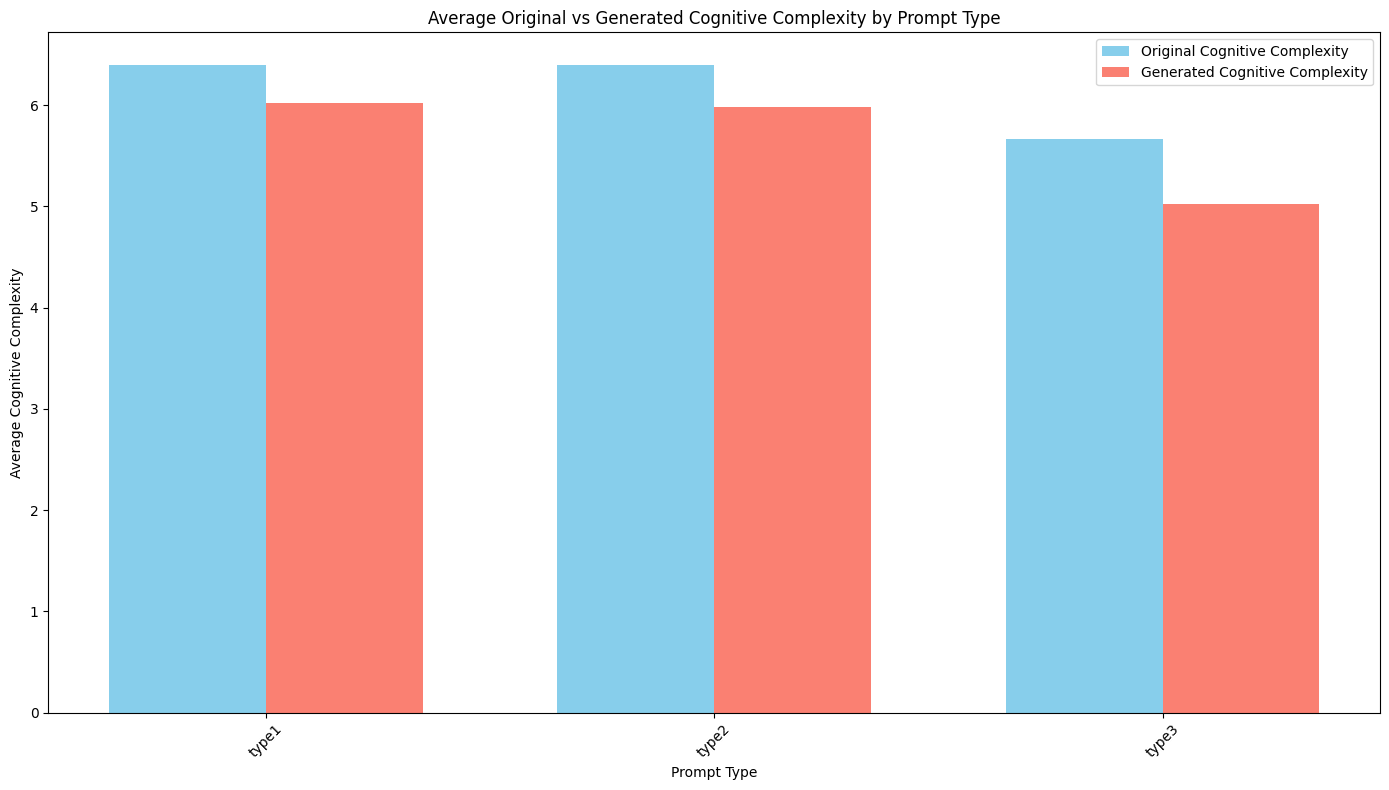

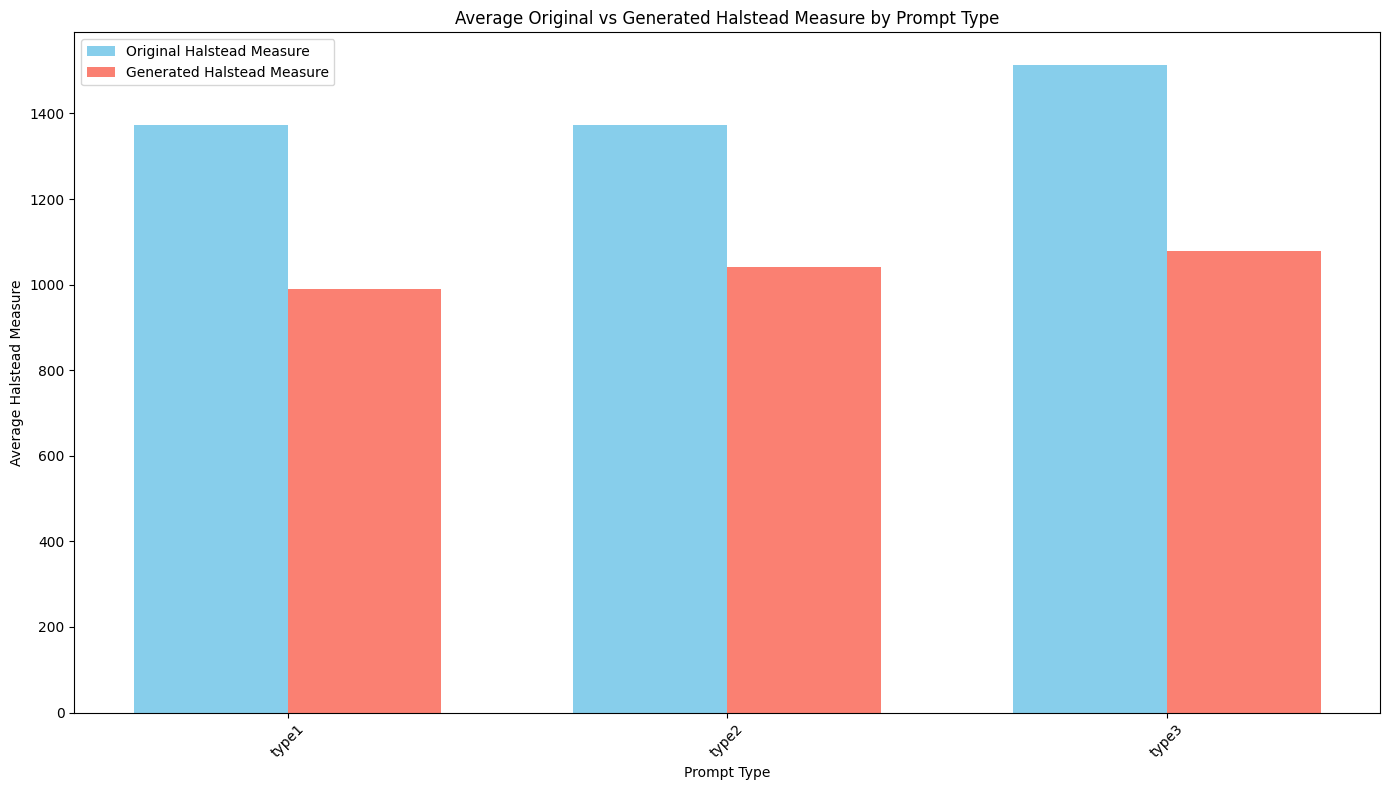

In [26]:
keys_to_group_by = ["Repo", "Model", "PromptType"]
labels = ["Repository", "Model", "Prompt Type"]

original_metrics_keys = ["OriginalLOC", "OriginalCC", "OriginalCOG", "OriginalHalstead"]
generated_metrics_keys = ["GeneratedLOC", "GeneratedCC", "GeneratedCOG", "GeneratedHalstead"]
metric_labels = ["Lines of Code", "Cyclomatic Complexity", "Cognitive Complexity", "Halstead Measure"]

dfs = [loc_df, cc_df, cog_df, halstead_df]

for i in trange(len(keys_to_group_by)):
    for j in trange(len(original_metrics_keys)):
        plot_grouped_chart(dfs[j], keys_to_group_by[i], labels[i], original_metrics_keys[j], f"Original {metric_labels[j]}", generated_metrics_keys[j], f"Generated {metric_labels[j]}", metric_labels[j], save=True)


In [ ]:
loc_df


,Repo,FunctionNumber,PromptType,Model,OriginalLOC,GeneratedLOC
0,craftship_codebox-npm,1,type1,GPT-3_5-Turbo,100,41
1,craftship_codebox-npm,1,type2,GPT-3_5-Turbo,100,50
2,craftship_codebox-npm,1,type3,GPT-3_5-Turbo,100,46
3,craftship_codebox-npm,1,type1,GPT-4,100,75
4,craftship_codebox-npm,1,type2,GPT-4,100,64
...,...,...,...,...,...,...
140,StackJanitor,3,type2,CodeQwen1_5-7B-Chat,109,32
141,StackJanitor,3,type3,CodeQwen1_5-7B-Chat,109,46
142,StackJanitor,3,type1,Artigenz-Coder-DS-6_7B,109,45
143,StackJanitor,3,type2,Artigenz-Coder-DS-6_7B,109,55


In [ ]:
average_codebleu_scores


,Repo,Model,GeneratedLOC
0,JuliaRegistries_TagBot,Artigenz-Coder-DS-6_7B,38.500000
1,JuliaRegistries_TagBot,CodeQwen1_5-7B-Chat,60.000000
2,JuliaRegistries_TagBot,DeepSeek-Coder-V2,58.500000
3,JuliaRegistries_TagBot,GPT-3_5-Turbo,49.500000
4,JuliaRegistries_TagBot,GPT-4,49.000000
5,StackJanitor,Artigenz-Coder-DS-6_7B,37.222222
6,StackJanitor,CodeQwen1_5-7B-Chat,32.888889
7,StackJanitor,DeepSeek-Coder-V2,40.000000
8,StackJanitor,GPT-3_5-Turbo,27.111111
9,StackJanitor,GPT-4,39.222222


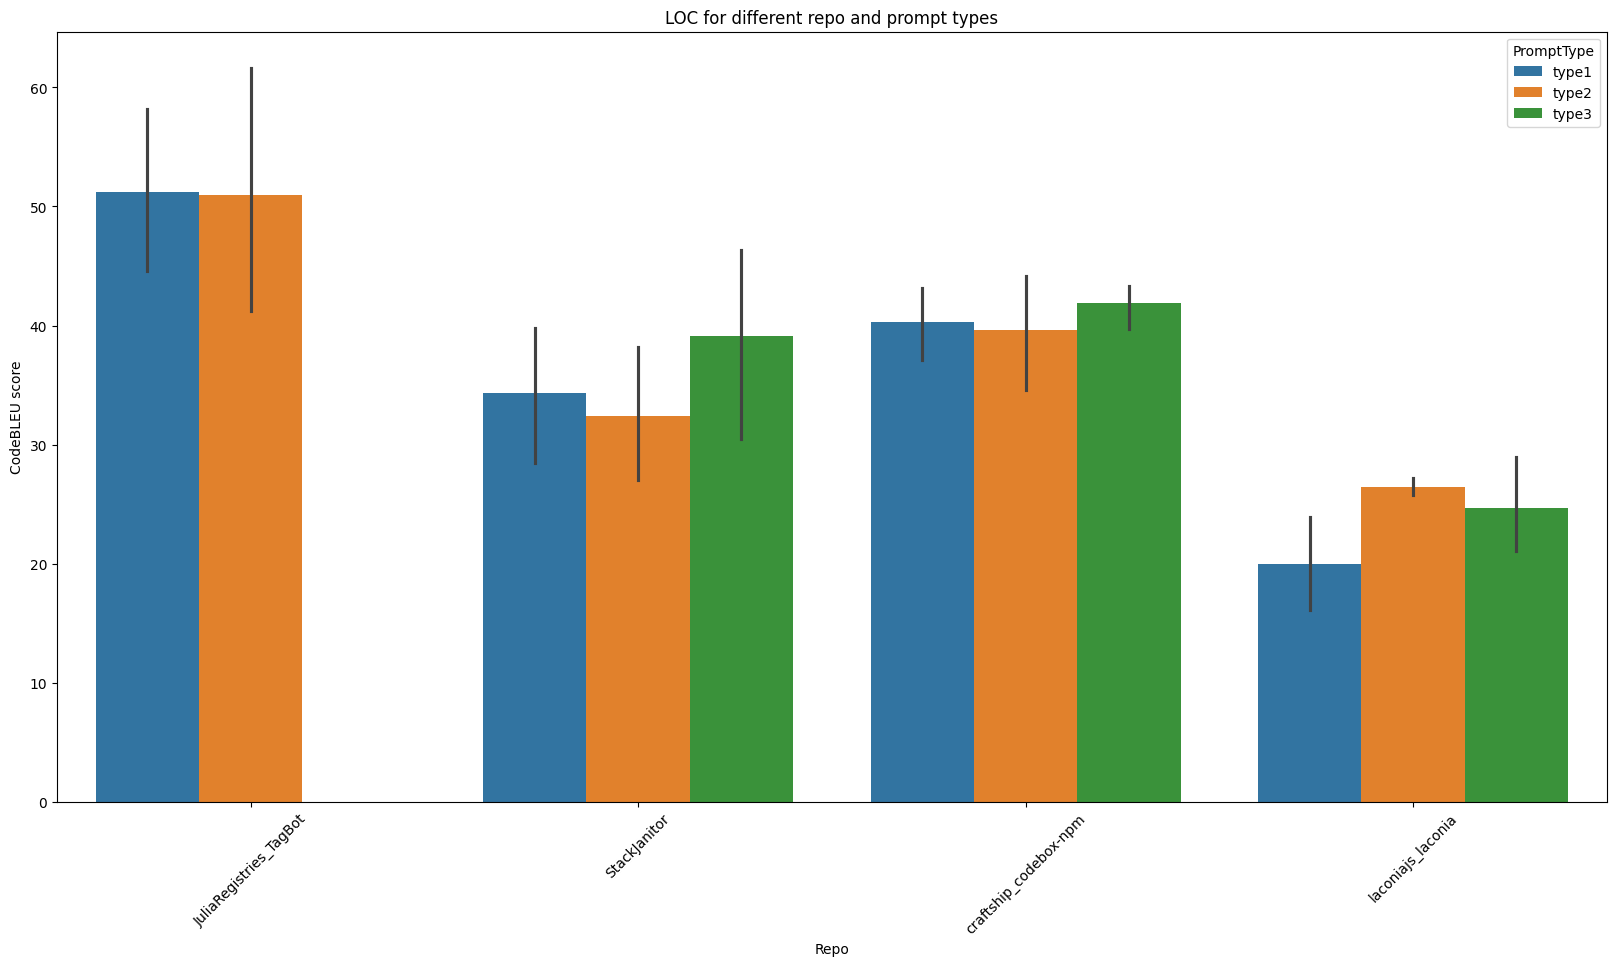

In [10]:
plt.figure(figsize=(20, 10))


loc2_df = loc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedLOC"].mean()

sns.barplot(x="Repo", y="GeneratedLOC", hue="PromptType", data=loc2_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("CodeBLEU score")
plt.xticks(rotation=45)
plt.show()


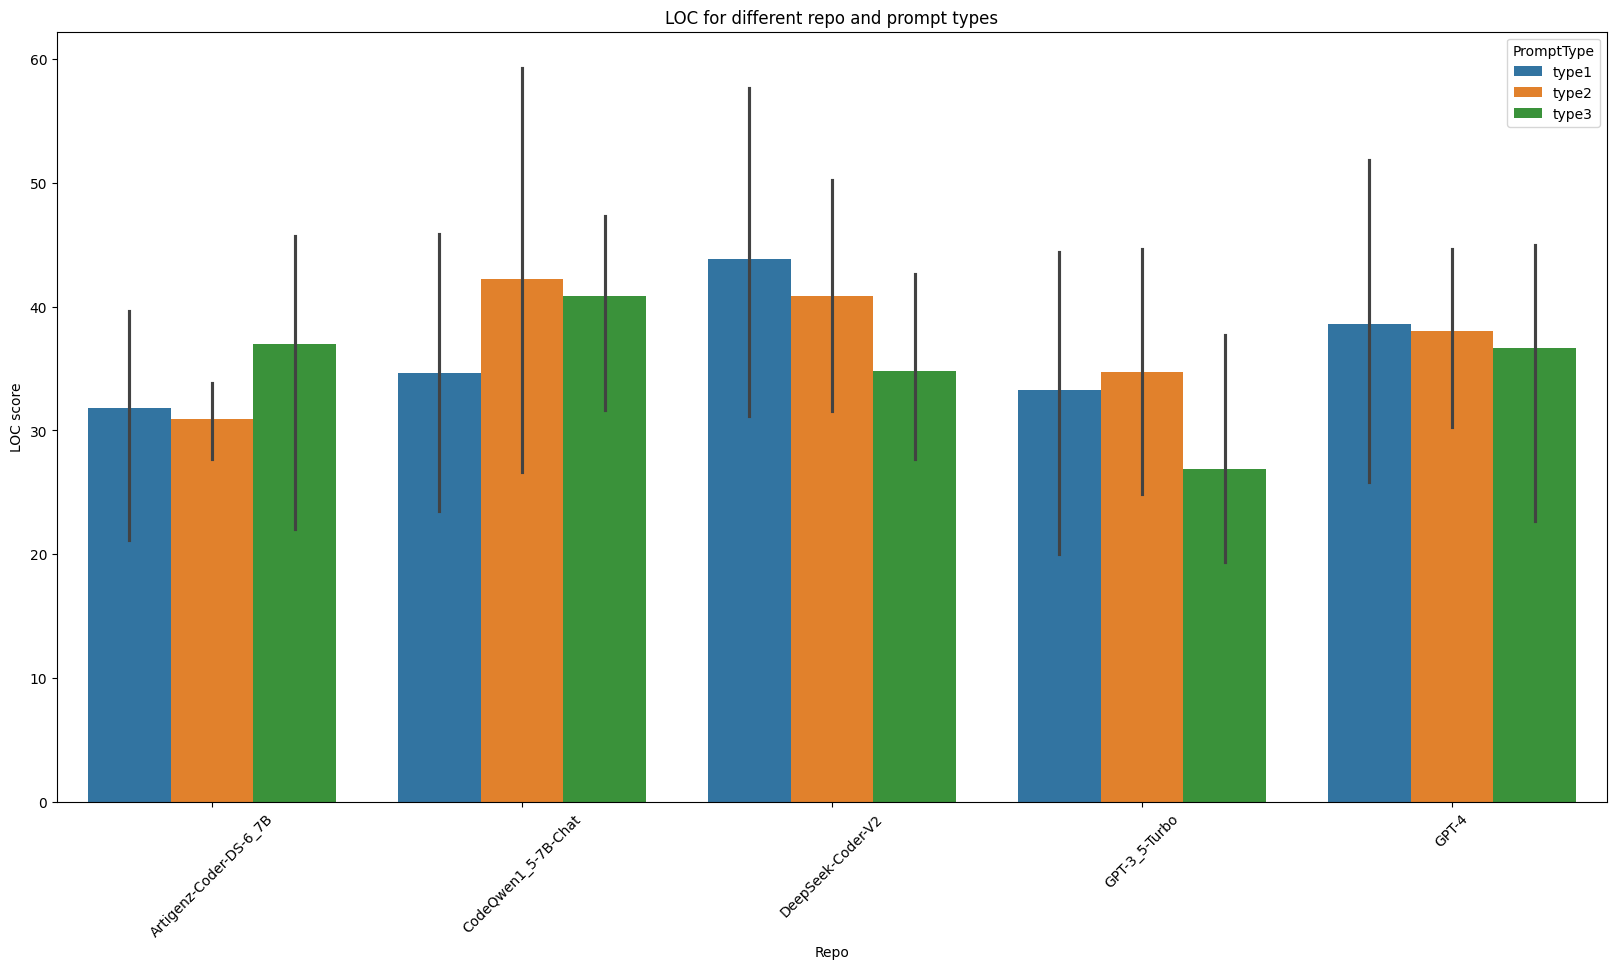

In [12]:
plt.figure(figsize=(20, 10))


loc2_df = loc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedLOC"].mean()

sns.barplot(x="Model", y="GeneratedLOC", hue="PromptType", data=loc2_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("LOC score")
plt.xticks(rotation=45)
plt.show()


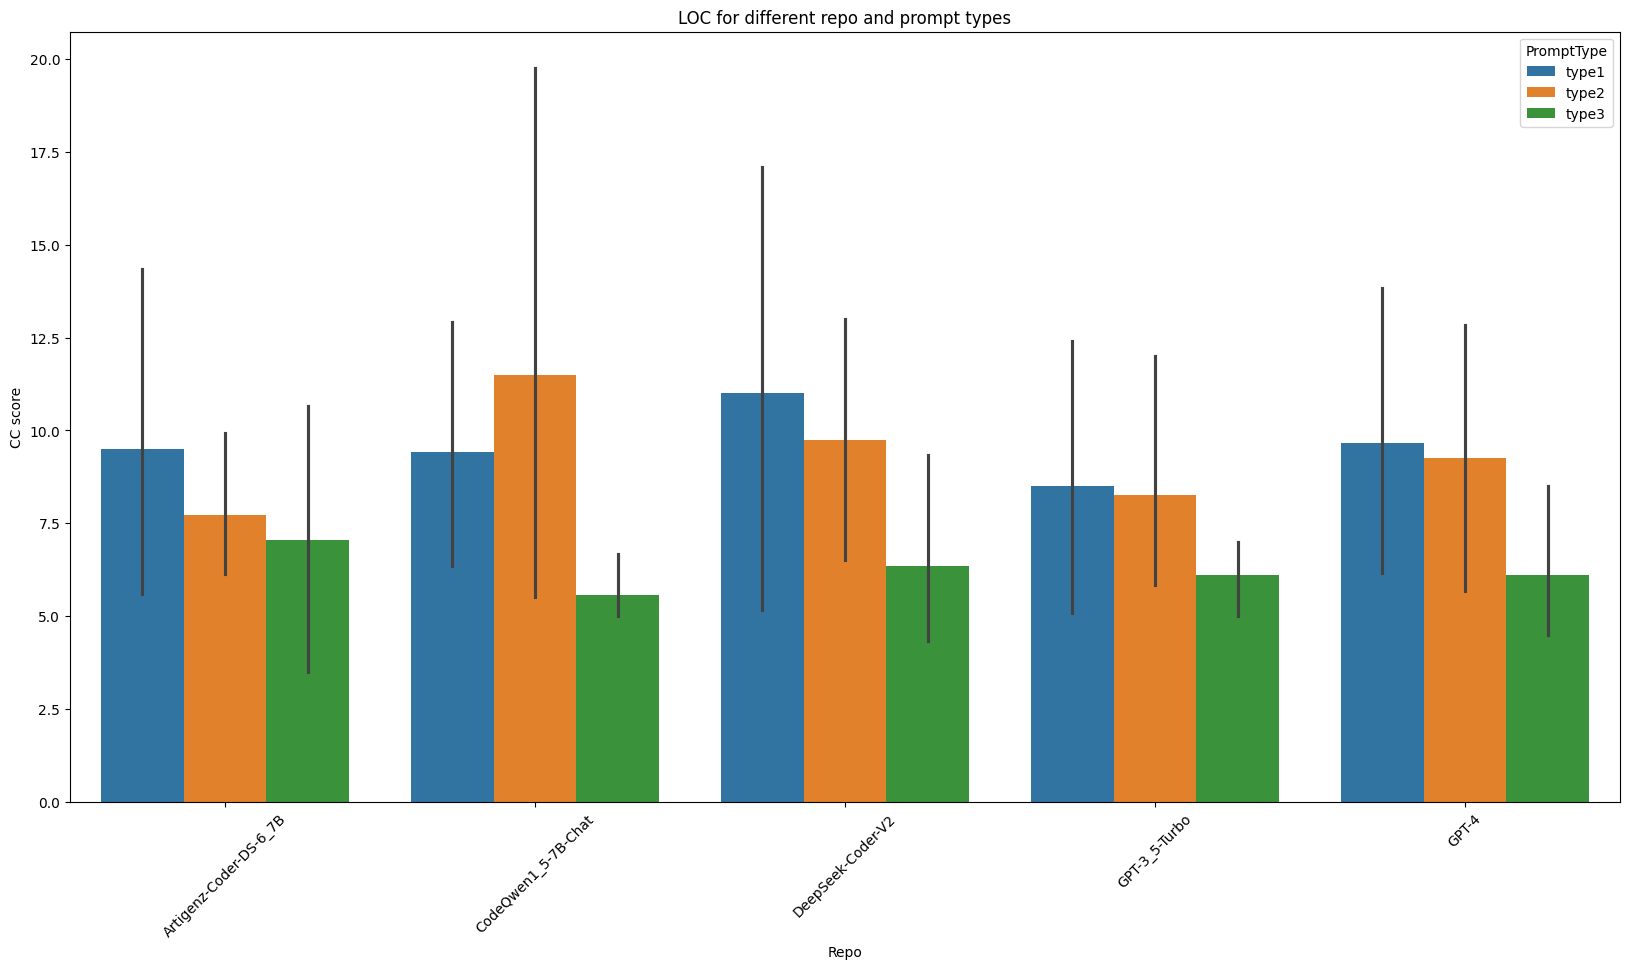

In [13]:
plt.figure(figsize=(20, 10))


data_df = cc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedCC"].mean()

sns.barplot(x="Model", y="GeneratedCC", hue="PromptType", data=data_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("CC score")
plt.xticks(rotation=45)
plt.show()


In [3]:
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
plt.rcParams['font.family'] = 'serif'

<IPython.core.display.Javascript object>

100%|██████████| 2/2 [00:00<00:00, 25.38it/s]


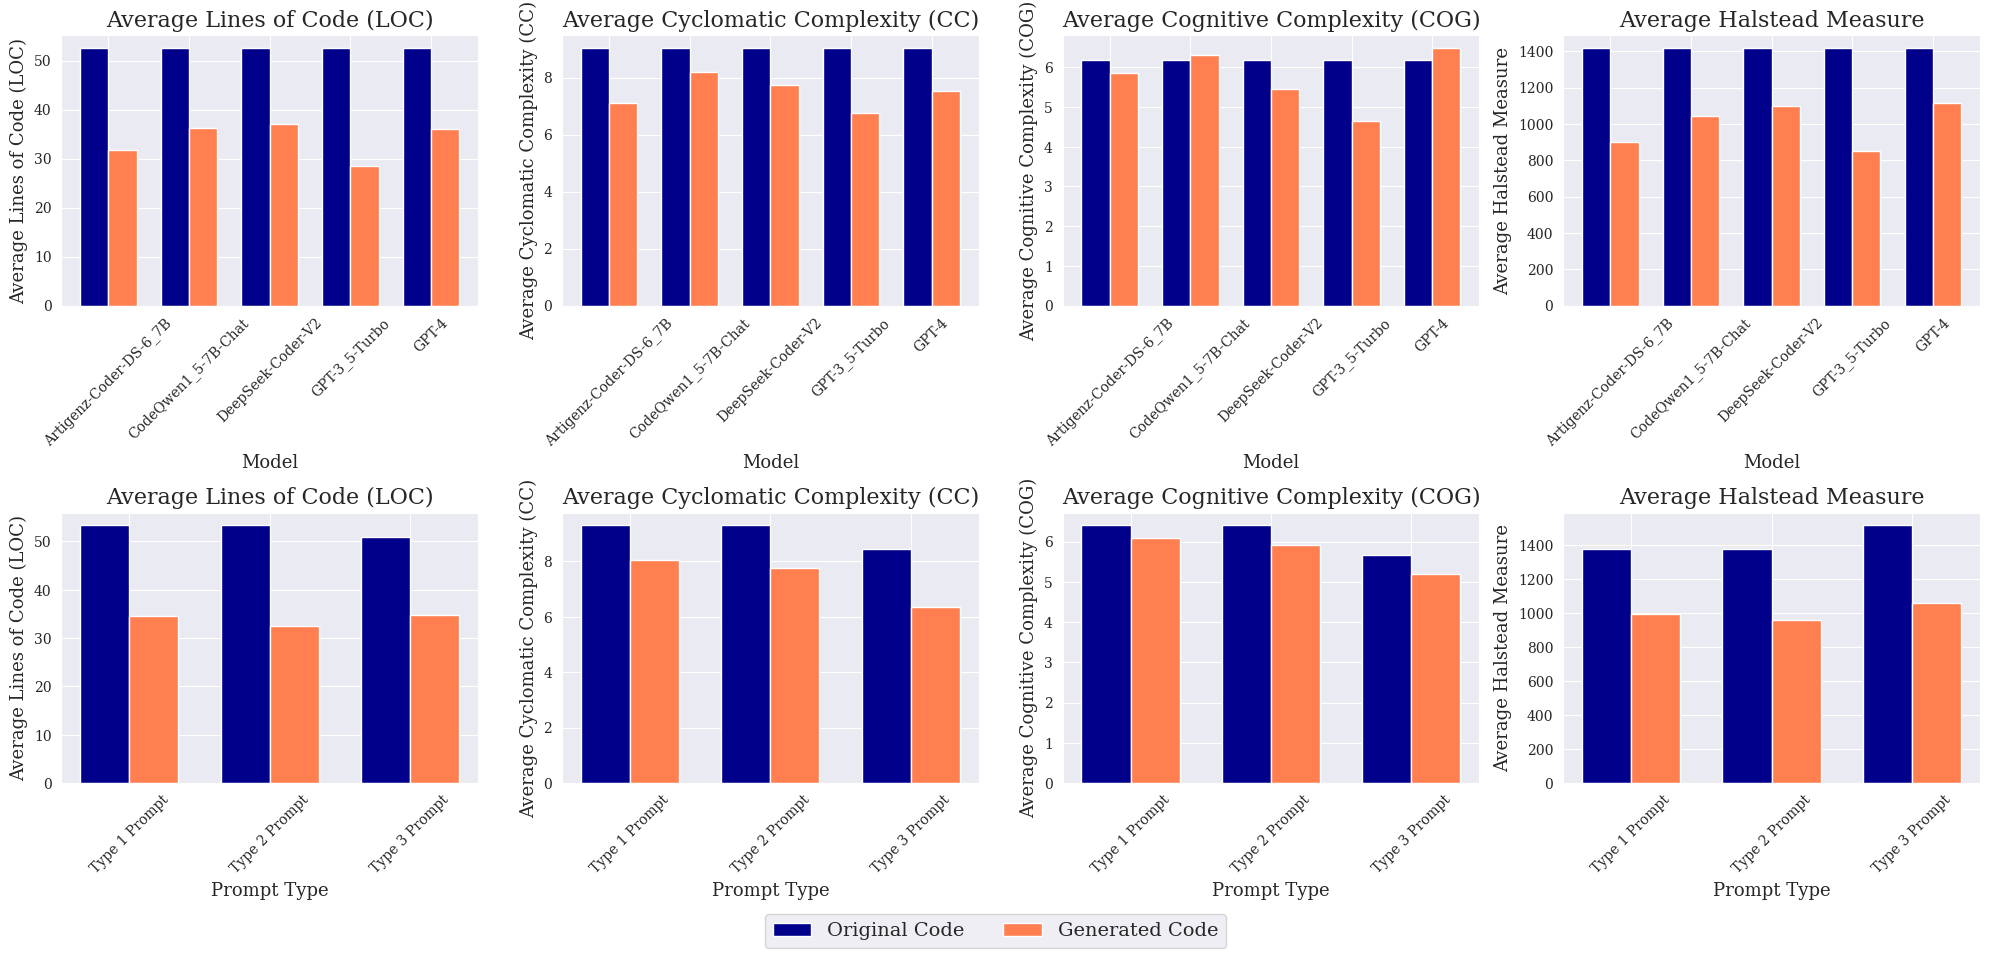

In [88]:
def plot_grouped_chart(df: pd.DataFrame, group_key: str, group_label: str, original_metric_key: str, original_label: str, generated_metric_key: str, generated_label: str, metric_label: str, ax: plt.Axes):
    grouped_df = df.groupby(group_key)[[original_metric_key, generated_metric_key]].mean().reset_index()

    bar_width = 0.35
    bar_positions = range(len(grouped_df))

    ax.bar(bar_positions, grouped_df[original_metric_key], width=bar_width, label=original_label, color="darkblue")
    ax.bar([pos + bar_width for pos in bar_positions], grouped_df[generated_metric_key], width=bar_width, label=generated_label, color="coral")

    ax.set_xlabel(group_label, fontsize=13)
    ax.set_ylabel(f"Average {metric_label}", fontsize=13)
    ax.set_title(f"Average {metric_label}", fontsize=16)
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    if group_key == "Model":
        ax.set_xticklabels(grouped_df[group_key], rotation=45)
    elif group_key == "PromptType":
        ax.set_xticklabels(["Type 1 Prompt", "Type 2 Prompt", "Type 3 Prompt"], rotation=45)
        
    # ax.set_xticklabels(grouped_df[group_key])
    # ax.legend()

    # ax.set_xticklabels(grouped_df[group_key], rotation=45)
    # ax.tight_layout()

keys_to_group_by = ["Model", "PromptType"]
labels = ["Model", "Prompt Type"]

original_metrics_keys = ["OriginalLOC", "OriginalCC", "OriginalCOG", "OriginalHalstead"]
generated_metrics_keys = ["GeneratedLOC", "GeneratedCC", "GeneratedCOG", "GeneratedHalstead"]
metric_labels = ["Lines of Code (LOC)", "Cyclomatic Complexity (CC)", "Cognitive Complexity (COG)", "Halstead Measure"]

dfs = [loc_df, cc_df, cog_df, halstead_df]

# Set up the figure with 2 rows and 4 columns

# Iterate over all combinations of metrics and group keys to plot them in the subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in trange(len(keys_to_group_by)):
    for j in trange(len(original_metrics_keys)):
        plot_grouped_chart(
            dfs[j], 
            keys_to_group_by[i], 
            labels[i], 
            original_metrics_keys[j], 
            f"Original {metric_labels[j]}", 
            generated_metrics_keys[j], 
            f"Generated {metric_labels[j]}", 
            metric_labels[j], 
            ax=axs[i, j]  # Assign the ax to the appropriate subplot
        )

    # plt.suptitle(f"Code Metrics: Original vs Generated by {labels[i]}", fontsize=16)
handles, label = axs[0, 0].get_legend_handles_labels()
label = ["Original Code", "Generated Code"]
fig.legend(handles, label, loc='upper left', bbox_to_anchor=(0.38, 0.04), prop={'size': 16}, ncol=2)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig(f"plots/original_vs_generated_Code_Metrics.png", dpi=600, bbox_inches='tight')
plt.show()


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

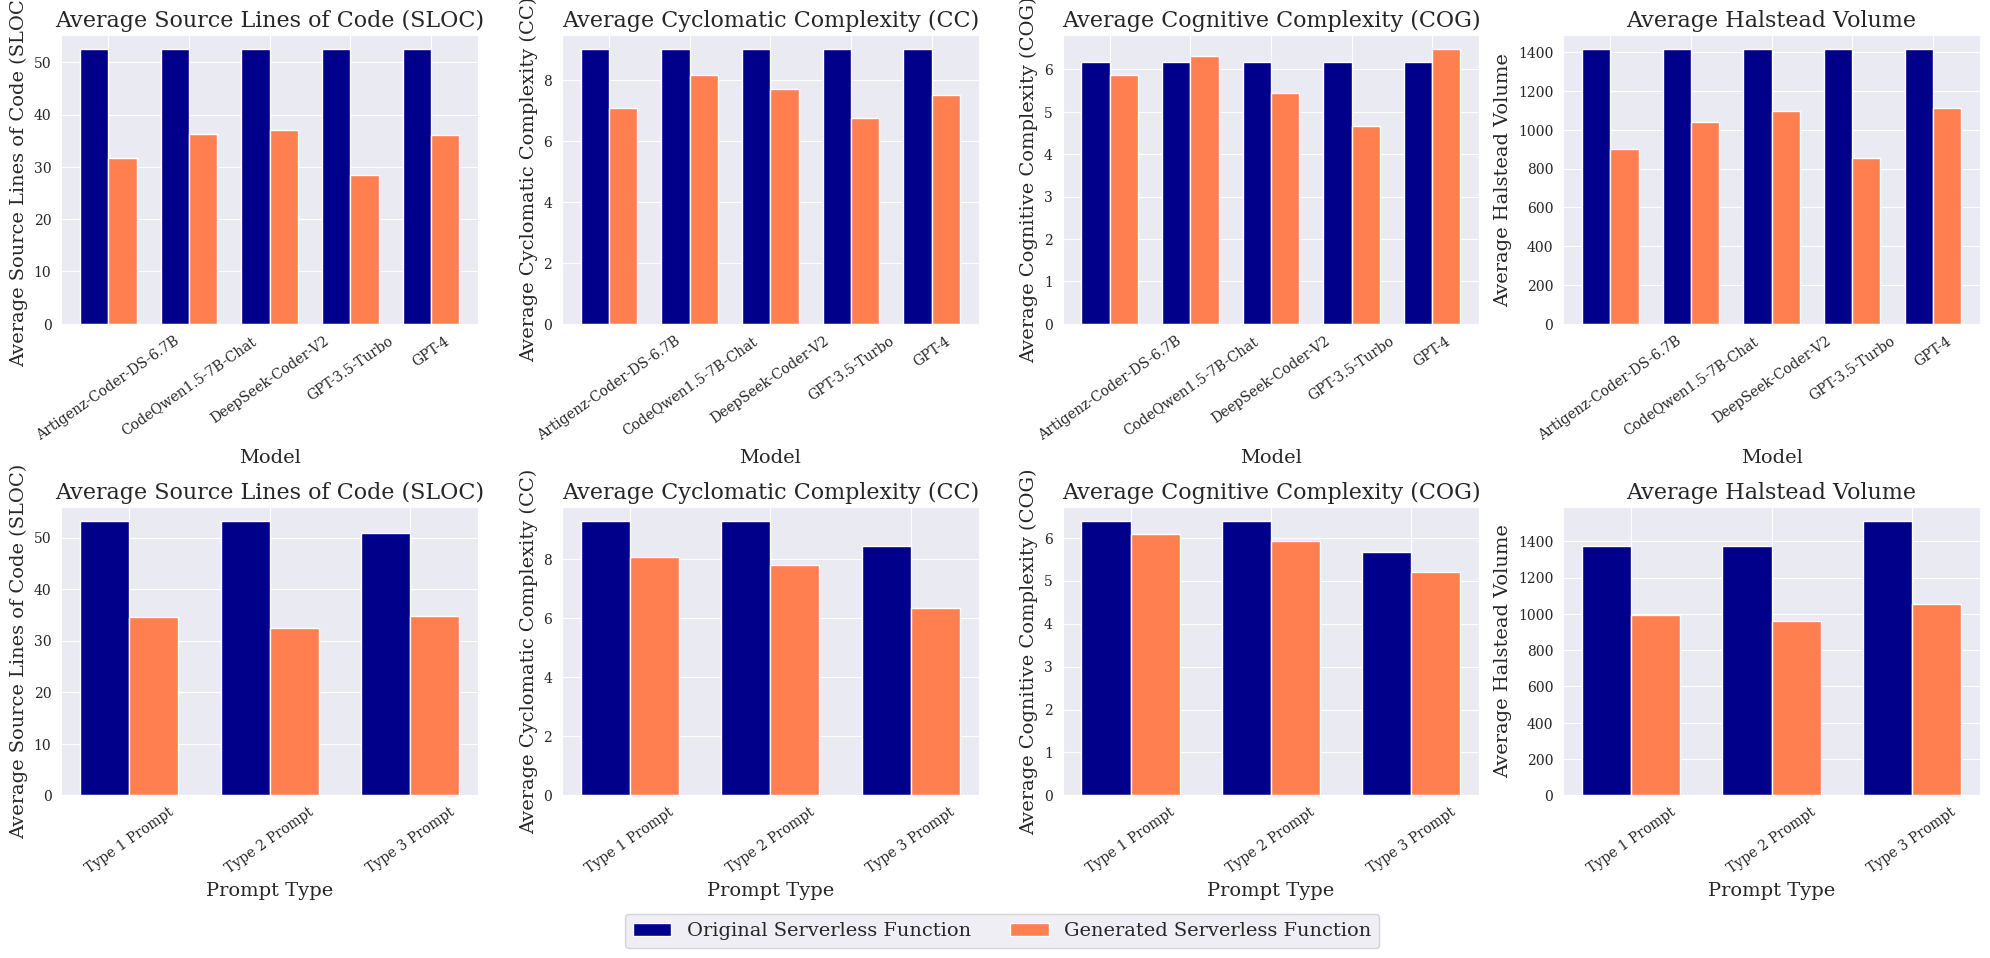

In [54]:
def plot_grouped_chart(df: pd.DataFrame, group_key: str, group_label: str, original_metric_key: str, original_label: str, generated_metric_key: str, generated_label: str, metric_label: str, ax: plt.Axes):
    grouped_df = df.groupby(group_key)[[original_metric_key, generated_metric_key]].mean().reset_index()

    bar_width = 0.35
    bar_positions = range(len(grouped_df))

    ax.bar(bar_positions, grouped_df[original_metric_key], width=bar_width, label=original_label, color="darkblue")
    ax.bar([pos + bar_width for pos in bar_positions], grouped_df[generated_metric_key], width=bar_width, label=generated_label, color="coral")

    ax.set_xlabel(group_label, fontsize=14)
    ax.set_ylabel(f"Average {metric_label}", fontsize=14)
    ax.set_title(f"Average {metric_label}", fontsize=16)
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    if group_key == "Model":
        ax.set_xticklabels(grouped_df[group_key], rotation=45)
        ax.set_xticklabels(["Artigenz-Coder-DS-6.7B", "CodeQwen1.5-7B-Chat", "DeepSeek-Coder-V2", "GPT-3.5-Turbo", "GPT-4"], rotation=35)
    elif group_key == "PromptType":
        ax.set_xticklabels(["Type 1 Prompt", "Type 2 Prompt", "Type 3 Prompt"], rotation=35)
        
    # ax.set_xticklabels(grouped_df[group_key])
    # ax.legend()

    # ax.set_xticklabels(grouped_df[group_key], rotation=45)
    # ax.tight_layout()

keys_to_group_by = ["Model", "PromptType"]
labels = ["Model", "Prompt Type"]

original_metrics_keys = ["OriginalLOC", "OriginalCC", "OriginalCOG", "OriginalHalstead"]
generated_metrics_keys = ["GeneratedLOC", "GeneratedCC", "GeneratedCOG", "GeneratedHalstead"]
metric_labels = ["Source Lines of Code (SLOC)", "Cyclomatic Complexity (CC)", "Cognitive Complexity (COG)", "Halstead Volume"]

dfs = [loc_df, cc_df, cog_df, halstead_df]

# Set up the figure with 2 rows and 4 columns

# Iterate over all combinations of metrics and group keys to plot them in the subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in trange(len(keys_to_group_by)):
    for j in trange(len(original_metrics_keys)):
        plot_grouped_chart(
            dfs[j], 
            keys_to_group_by[i], 
            labels[i], 
            original_metrics_keys[j], 
            f"Original {metric_labels[j]}", 
            generated_metrics_keys[j], 
            f"Generated {metric_labels[j]}", 
            metric_labels[j], 
            ax=axs[i, j]  # Assign the ax to the appropriate subplot
        )

    # plt.suptitle(f"Code Metrics: Original vs Generated by {labels[i]}", fontsize=16)
handles, label = axs[0, 0].get_legend_handles_labels()
label = ["Original Serverless Function", "Generated Serverless Function"]
fig.legend(handles, label, loc='upper left', bbox_to_anchor=(0.31, 0.04), prop={'size': 14}, ncol=2)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"plots/original_vs_generated_Code_Metrics.png", dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
codebleu_scores_df = pd.read_csv("codebleu_scores.csv")

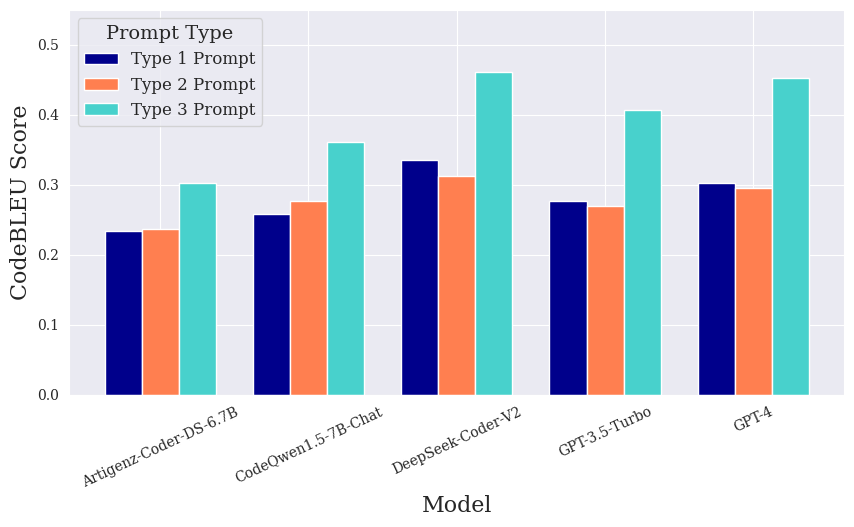

In [47]:
# Calculate average CodeBLEU scores by Model and PromptType
average_codebleu_scores = codebleu_scores_df.groupby(["Model", "PromptType"], as_index=False)["CodeBLEU"].mean()

# Extract unique models and prompt types
models = average_codebleu_scores["Model"].unique()
prompt_types = average_codebleu_scores["PromptType"].unique()

# Define bar width and positions for grouped bars
bar_width = 0.25
x = np.arange(len(models))

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each prompt type
colors = ["darkblue", "coral", "mediumturquoise"]
for i, prompt_type in enumerate(prompt_types):
    # Filter data for the current prompt type
    data = average_codebleu_scores[average_codebleu_scores["PromptType"] == prompt_type]
    
    # Plot bars for the current prompt type
    ax.bar(x + i * bar_width, data["CodeBLEU"], width=bar_width, label=f"Type {i + 1} Prompt", color=colors[i])

# Set title and labels
# ax.set_title("CodeBLEU Scores for Different Models and Prompt Types", fontsize=16)
ax.set_xlabel("Model", fontsize=16)
ax.set_ylabel("CodeBLEU Score", fontsize=16)
ax.set_xticks(x + bar_width * (len(prompt_types) - 1) / 2)
ax.set_xticklabels(models, rotation=45)
ax.set_ylim(0, 0.55)

# change x ticks names
ax.set_xticklabels(["Artigenz-Coder-DS-6.7B", "CodeQwen1.5-7B-Chat", "DeepSeek-Coder-V2", "GPT-3.5-Turbo", "GPT-4"], rotation=25)

# Customize the legend
ax.legend(title="Prompt Type", fontsize=12, title_fontsize=14)

# Save and display the plot
plt.savefig("plots/CodeBLEU Scores.png", dpi=1100, bbox_inches="tight")
plt.show()
